## Importing the relevant Libraries for this project

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
import seaborn as sns

## Setting Pandas dataframe display options

In [235]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Importing the training dataset

In [164]:
training_data = pd.read_csv('train.csv')

In [165]:
training_data 

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


## Importing Testing data

In [162]:
test_data = pd.read_csv('test.csv')

In [163]:
test_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


## Deleting the Address column 

In [166]:
## This is to improve the performance of our model
del training_data['ADDRESS'], test_data['ADDRESS']

In [167]:
training_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,12.900150,80.227910,67.0


## Checking for Null Values in training data

In [177]:
training_data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

## Checking for Correlation in the columns of the training data 

<AxesSubplot:>

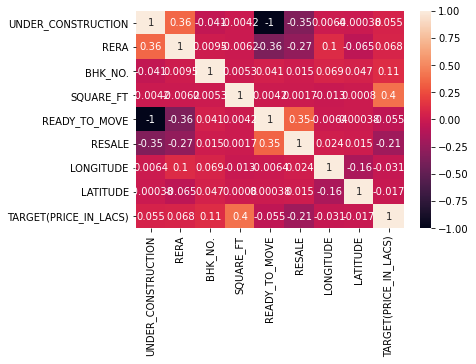

In [160]:
sns.heatmap(training_data.corr(),annot=True)

## Checking the data types of the various columns in the training data

In [107]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


## More Exploratory data analysis on the training data 

In [109]:
training_data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


## Checking the value counts of the columns in the training data 

In [116]:
print(training_data['POSTED_BY'].value_counts())
print(training_data['BHK_NO.'].value_counts())
print(training_data['RESALE'].value_counts())
print(training_data['READY_TO_MOVE'].value_counts())
print(training_data['UNDER_CONSTRUCTION'].value_counts())
print(training_data['BHK_OR_RK'].value_counts())
print(training_data['RERA'].value_counts())


Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
20        4
10        4
15        4
9         3
12        3
17        1
11        1
13        1
Name: BHK_NO., dtype: int64
1    27377
0     2074
Name: RESALE, dtype: int64
1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64
0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64
BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64
0    20088
1     9363
Name: RERA, dtype: int64


## Extracting the training data values for splitting and model building 

In [124]:
X = training_data.iloc[:,0:-1].values

y = training_data.iloc[:,-1].values


In [125]:
X

array([['Owner', 0, 0, ..., 1, 12.96991, 77.59796],
       ['Dealer', 0, 0, ..., 1, 12.274538, 76.644605],
       ['Owner', 0, 0, ..., 1, 12.778033, 77.632191],
       ...,
       ['Dealer', 0, 0, ..., 1, 26.928785, 75.828002],
       ['Owner', 0, 0, ..., 1, 12.90015, 80.22791],
       ['Dealer', 0, 1, ..., 1, 26.832353, 75.841749]], dtype=object)

In [126]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   LONGITUDE              29451 non-null  float64
 9   LATITUDE               29451 non-null  float64
 10  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.5+ MB


## Instantiating the Label Encoder for categorical variables POSTED_BY and  BHK_OR_RK  

In [121]:
le = LabelEncoder()

In [127]:
X[:, 0]

array(['Owner', 'Dealer', 'Owner', ..., 'Dealer', 'Owner', 'Dealer'],
      dtype=object)

In [128]:
X[:, 0] = le.fit_transform(X[:, 0])

In [129]:
X[:, 0]

array([2, 1, 2, ..., 1, 2, 1], dtype=object)

In [130]:
X[:,4]

array(['BHK', 'BHK', 'BHK', ..., 'BHK', 'BHK', 'BHK'], dtype=object)

In [131]:
X[:,4] = le.fit_transform(X[:, 4])

In [132]:
X[:,4]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

## Splitting using Sklearn's train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [135]:
X_train.shape

(23560, 10)

In [137]:
X_test.shape

(5891, 10)

## Feature scalling the train_test_split data 

In [138]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Instantiting XGBoost and fitting on train data

In [139]:
model_one = XGBRegressor( 
    n_estimators = 500,
    learning_rate=0.02, 
    #min_child_weight=3,
    #max_depth = 3,
    #subsample = 0.8,
    seed=7)


model_one = model_one.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    #early_stopping_rounds=20,
    #eval_set=[(X_test, y_test)],
    verbose=False)

In [142]:
y_pred = model_one.predict(X_test)

print('Train metrics...')

print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred)))




Train metrics...
RMSE Scaled Data:  117.36631217546278


## Checking R Squared for XGboost Model

In [147]:
print('r2_score: ', r2_score(y_pred, y_test))

r2_score:  0.9661636633616022


In [145]:
model_one.score(X_test, y_test)

0.96999151774662

## Instantianting Linear Regression Model and fitting on the training data

In [148]:
model_two = LinearRegression().fit(X_train, y_train)

In [180]:
y_pred_2 = model_two.predict(X_test)

print('Train metrics...')
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred_2)))

Train metrics...
RMSE Scaled Data:  542.1185261545302


## Checking R Squared for Linear Regression Model

In [150]:
print('r2_score: ', r2_score(y_pred_2, y_test))

r2_score:  -1.328381417535486


In [151]:
model_two.score(X_test, y_test)

0.3597558613871711

## Instantianting DecisionTree Regression Model and fitting on the training data

In [152]:
model_three = DecisionTreeRegressor().fit(X_train, y_train)

In [181]:
y_pred_3 = model_three.predict(X_test)

print('Train metrics...')
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred_3)))

Train metrics...
RMSE Scaled Data:  166.55777402720443


## Checking R Squared for DecisionTree Regression Model

In [183]:
print('r2_score: ', r2_score(y_pred_3, y_test))

r2_score:  0.9347026968929257


In [153]:
model_three.score(X_test, y_test)

0.939565222236504

## Instantianting RandomForest Regression Model and fitting on the training data

In [154]:
model_four = RandomForestRegressor().fit(X_train, y_train)

In [155]:
model_four.score(X_test, y_test)

0.9531915868901951

In [182]:
y_pred_4 = model_four.predict(X_test)

print('Train metrics...')
print('RMSE Scaled Data: ', np.sqrt(mean_squared_error(y_test, y_pred_4)))

Train metrics...
RMSE Scaled Data:  146.5829313234735


## Checking R Squared for RandomForest Regression Model

In [185]:
print('r2_score: ', r2_score(y_pred_4, y_test))

r2_score:  0.9426514623674321


## From all four models, XGBoost performs better than all. As such We will use on the test_data

In [186]:
test_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,18.496670,73.941670


## Transforming the Test data for Prediction

In [214]:
X2 = test_data.values

In [215]:
X2

array([['Owner', 0, 0, ..., 1, 21.262, 73.0477],
       ['Dealer', 1, 1, ..., 0, 18.966114, 73.148278],
       ['Dealer', 0, 0, ..., 1, 22.5922, 88.484911],
       ...,
       ['Dealer', 1, 1, ..., 0, 19.222101, 72.988231],
       ['Dealer', 0, 0, ..., 1, 18.49667, 73.94167],
       ['Dealer', 0, 0, ..., 1, 19.124896, 72.89350300000001]],
      dtype=object)

In [216]:
X2[:, 0] = le.fit_transform(X2[:, 0])

In [217]:
X2[:, 0]

array([2, 1, 1, ..., 1, 1, 1], dtype=object)

In [218]:
X2[:, 4] = le.fit_transform(X2[:, 4])

In [219]:
X2[:, 4]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [221]:
# Feature Scaling
sc2 = StandardScaler()
X2_test = sc2.fit_transform(X2)

In [239]:
prediction = model_one.predict(X2_test).round(1)

In [240]:
prediction

array([8.0000e+00, 1.8830e+02, 3.2300e+01, ..., 8.8241e+03, 5.4000e+01,
       1.0261e+03], dtype=float32)

In [241]:
test_data['Prediction (PRICE_IN_LACS)'] = prediction 

In [244]:
test_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,Prediction (PRICE_IN_LACS)
0,Owner,0,0,1,BHK,545.171340,1,1,21.262000,73.047700,8.000000
1,Dealer,1,1,2,BHK,800.000000,0,0,18.966114,73.148278,188.300003
2,Dealer,0,0,2,BHK,1257.096513,1,1,22.592200,88.484911,32.299999
3,Dealer,0,0,3,BHK,1400.329489,1,1,26.988300,75.584600,82.599998
4,Owner,0,0,1,BHK,430.477830,1,1,22.700000,72.870000,6.700000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,19.180000,72.963330,259.899994
68716,Dealer,0,1,3,BHK,2304.147465,1,1,30.661104,76.746082,131.500000
68717,Dealer,1,1,1,BHK,33362.792750,0,0,19.222101,72.988231,8824.099609
68718,Dealer,0,0,2,BHK,1173.708920,1,1,18.496670,73.941670,54.000000


## Tranforming Pandas dataframe to Excel File 

In [234]:
test_data.to_excel('Summision.xlsx', index = False)